# ***Binary Classification with Bank Churn Dataset***
### *`Author:`* *Muhammad Furqan*
### *[LinkedIn](https://www.linkedin.com/in/iammuhammadfurqan/)* 
### *[Github](https://github.com/iammuhammadfurqan)*
### *[Kaggle](https://www.kaggle.com/muhammadfurqan0)*
### *`Start Date:`* *23-01-2024*
### *`End Date:`* *24-01-2024*
### *`Dataset:`* *[Binary Classification with Bank Churn Dataset](https://www.kaggle.com/competitions/playground-series-s4e1)*

## AIM: *`We will classify that which customers who will stay in our bank or leave our bank with different Models`* 
- 1. Deep Learning(Neural Networks)
- 2. XGBoost
- 3. LightGBM Classifier
- 4. CatBoost Classifier

## Dataset Description:

- `Customer ID`: A special number for each customer

- `Surname`: The customer's last name

- `Credit Score`: A number showing how good the customer is with money

- `Geography`: The country where the customer lives

- `Gender`: Whether the customer is a man or a woman

- `Age`: How old the customer is

- `Tenure`: How many years the customer has been with the bank

- `Balance`: How much money the customer has in their account

- `NumOfProducts`: How many bank things the customer uses, like savings or credit cards

- `HasCrCard`: If the customer has a credit card or not

- `IsActiveMember`: If the customer is actively using the bank services

- `EstimatedSalary`: An estimate of how much the customer earns

- `Exited`: If the customer has left the bank (this is what we want to find out)

In [2]:
# Import the Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras.callbacks import EarlyStopping

# remove warnings
import warnings
warnings.filterwarnings('ignore')

## Let's Explore the Data

In [3]:
# laod the datasets
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

### Sneak Preview of Data

Achieve a rapid glimpse of your dataset with just one line of code! This convenient approach allows you to swiftly review the initial rows of your data, providing you with an instant grasp of the dataset's content without the need to scroll through the entire file.

In [4]:
# train dataset and exploration
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [6]:
df = df_train.copy()

### View Column Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


### Information about Shape of Dataset

In [8]:
#print the shape of the dataframe to check the number of rows and columns with proper f'srting message
print(f'The Training Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The Training Dataset has 165034 rows and 14 columns.


### View Column Names

In [9]:
df.columns.values

array(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [10]:
# find and sum the null values
null_sum = df.isnull().sum().sort_values(ascending=False)
null_sum

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

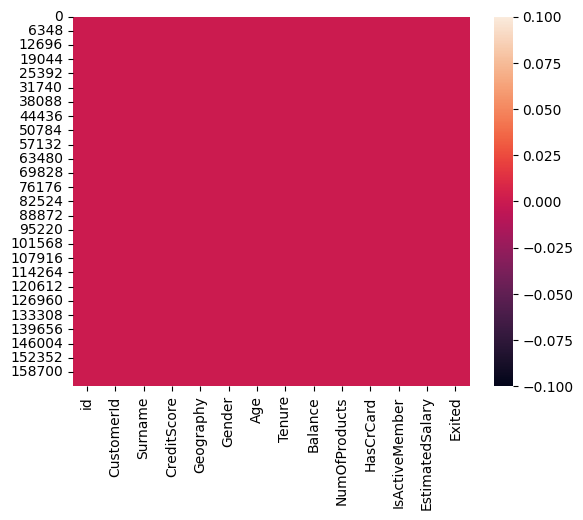

In [11]:
# find and plot the null values
sns.heatmap(df.isnull())
plt.show()

> ***`Figure-1:`*** From Figure we can easily see that there is no Missing/Null values in our Dataset

### Summary of Data Characteristics

Descriptive statistics are employed to succinctly summarize and gain insight into the fundamental characteristics of the dataset.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


***`Observation: `*** Looking at these simple statistics, we find that:
- Tenure: It goes from 0 to 10 
- NumOfProducts: Goes from 1 to 4
- HasCrCard: Goes from 0 to 1
- IsActiveMember: Goes from 0 to 1
- Exited: Goes from 0 to 1 (This is what we are trying to predict)

Based on this, we can consider them as categories (categories with specific values) rather than continuous numerical values.

In [13]:
cat_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']

num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# find the value counts of the categorical columns
for col in cat_cols:
    print(df[col].value_counts())
    print()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

Gender
Male      93150
Female    71884
Name: count, dtype: int64

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

Exited
0    130113
1     34921
Name: count, dtype: int64



### Let's See the Distribution of **Geography** Column 

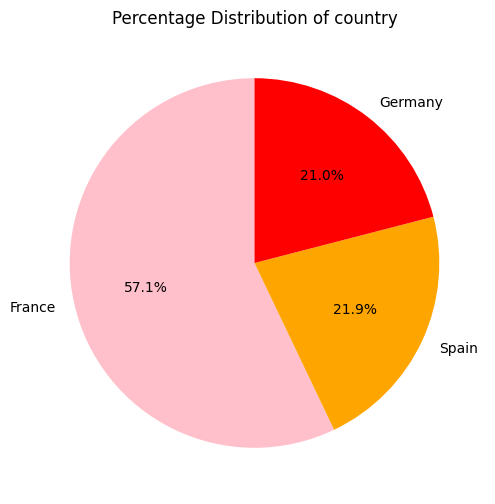

In [14]:
plt.figure(figsize=(10,6))
plt.pie(df['Geography'].value_counts(), labels=df['Geography'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['pink', 'orange', 'red'])
plt.title('Percentage Distribution of country')
plt.show()


> ***`Figure-2:`*** From Figure we can easily see that:
- 57.1% belongs to France
- 21.0% belongs to Germany
- 21.9% belongs to Spain

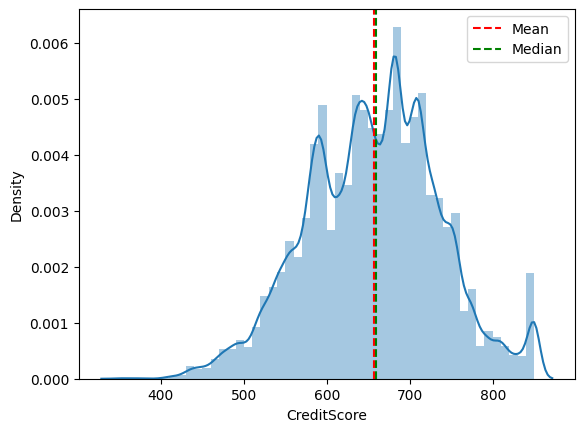

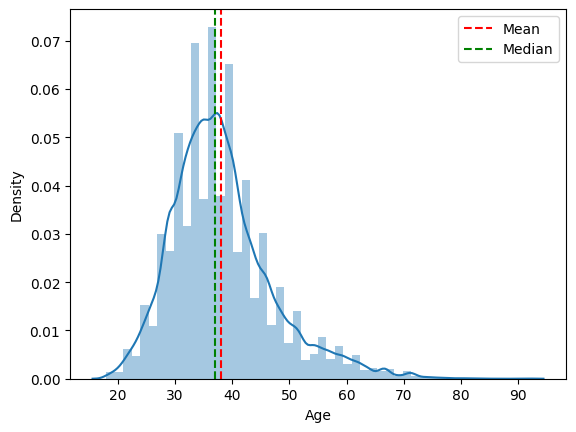

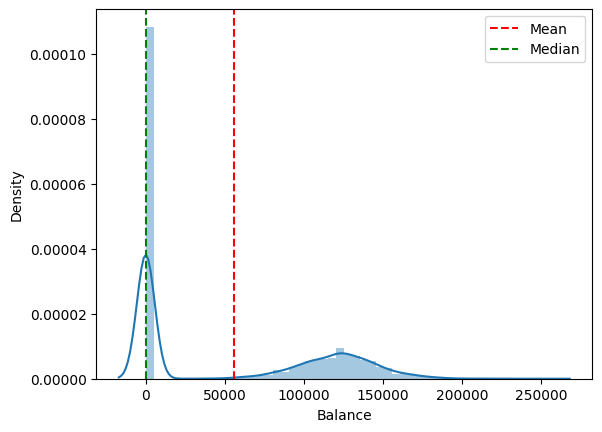

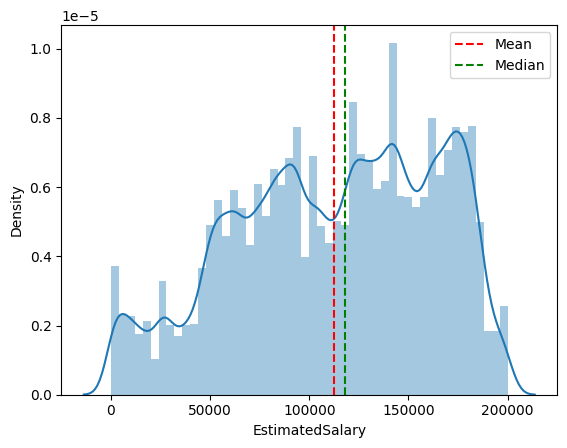

In [15]:
# create histogram of numerical columns using sns and kde=true
for col in num_cols:
    sns.distplot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()


**`Observation:`** From above Figures We clearly see that:
|               | Mean    | Median               |
|---------------|---------|----------------------|
| CreditScore   | 660     | 660 (on same Point)  |
| Age           | 38      | 39                   |
| Balance       | 0 (because most of users have no balance) | 55000 to 60000 |
| EstimatedSalary| 115000 | 120000               |


In [16]:

df.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         78643
           1         15572
Germany    0         21492
           1         13114
Spain      0         29978
           1          6235
Name: count, dtype: int64

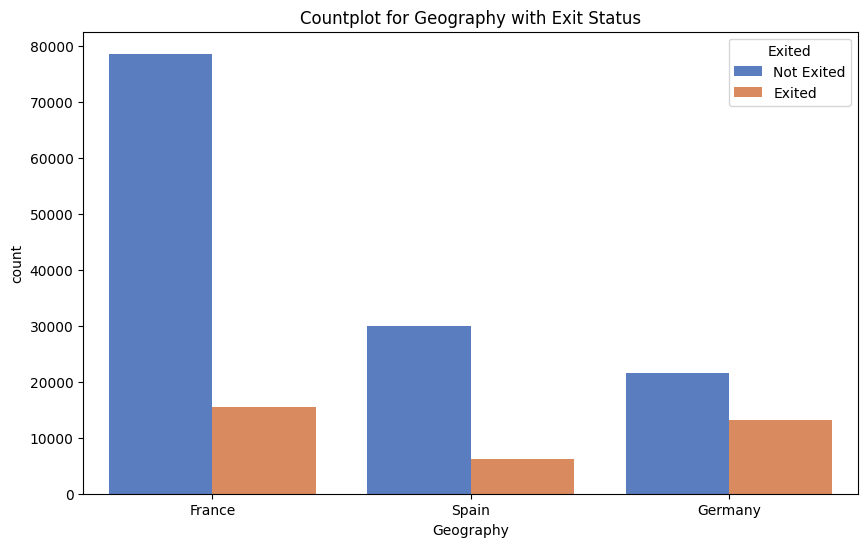

In [17]:
# Assuming 'Exited' is the target variable you want to differentiate
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', data=df, hue='Exited', palette='muted')

# Customize legend labels
plt.legend(title='Exited', labels=['Not Exited', 'Exited'])

plt.title('Countplot for Geography with Exit Status')
plt.show()


> ***`Figure-3:`*** Provides us information about **Exited** and **Non-Exited** Users from **Geography**

In [18]:

df.groupby('Gender')['Exited'].value_counts()

Gender  Exited
Female  0         51779
        1         20105
Male    0         78334
        1         14816
Name: count, dtype: int64

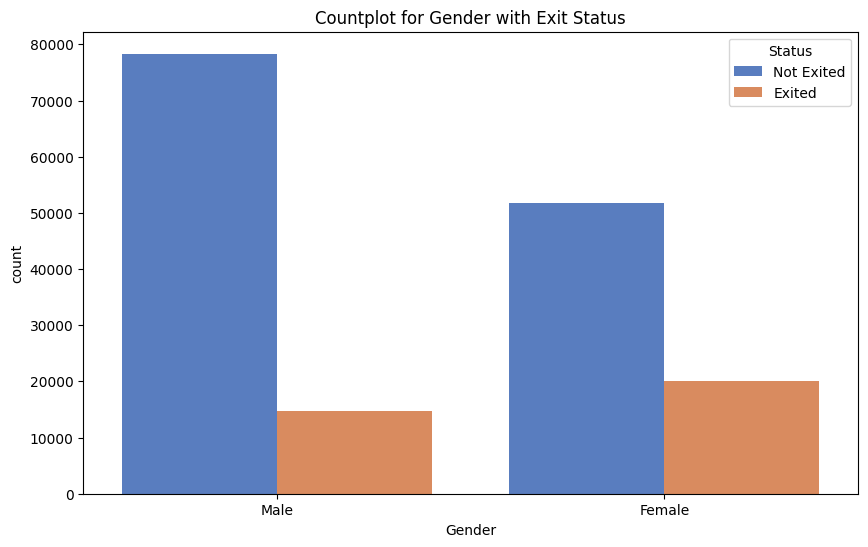

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df, hue='Exited', palette='muted')

plt.title('Countplot for Gender with Exit Status')
# Customize legend labels
plt.legend(title='Status', labels=['Not Exited', 'Exited'])

plt.show()



> ***`Figure-4:`*** Provides us information about **Exited** and **Non-Exited** Users based on **Gender**

In [20]:

df.groupby('Tenure')['Exited'].value_counts()

Tenure  Exited
0       0          3731
        1          1276
1       0         12970
        1          3790
2       0         14529
        1          3516
3       0         12820
        1          3810
4       0         13580
        1          3974
5       0         13468
        1          3800
6       0         12677
        1          3145
7       0         14469
        1          3341
8       0         14052
        1          3468
9       0         13165
        1          3544
10      0          4652
        1          1257
Name: count, dtype: int64

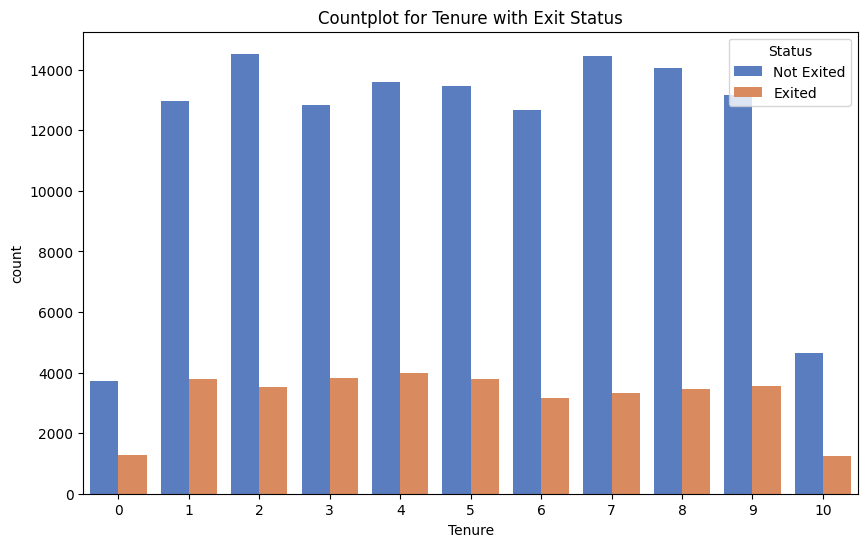

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', data=df, hue='Exited', palette='muted')
plt.title('Countplot for Tenure with Exit Status')
# Customize legend labels
plt.legend(title='Status', labels=['Not Exited', 'Exited'])

plt.show()


> ***`Figure-5:`*** Provides us information about **Exited** and **Non-Exited** Users from **Tenure** Column:

In [22]:
df.groupby('NumOfProducts')['Exited'].value_counts()

NumOfProducts  Exited
1              0         50516
               1         26858
2              0         79198
               1          5093
3              1          2554
               0           340
4              1           416
               0            59
Name: count, dtype: int64

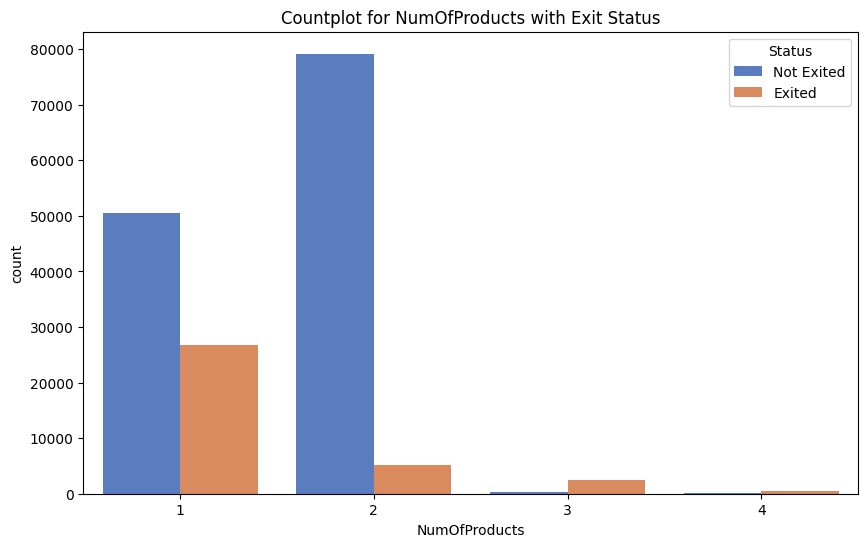

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', data=df, hue='Exited', palette='muted')

# Customize legend labels
plt.legend(title='Status', labels=['Not Exited', 'Exited'])

plt.title('Countplot for NumOfProducts with Exit Status')
plt.show()


> ***`Figure-6:`*** Provides us information about **Exited** and **Non-Exited** Users from **NumOfProducts** Column:

In [24]:
# find the value count of 'age' column grouped by 'sex' column
df.groupby('HasCrCard')['Exited'].value_counts()

HasCrCard  Exited
0.0        0         31371
           1          9235
1.0        0         98742
           1         25686
Name: count, dtype: int64

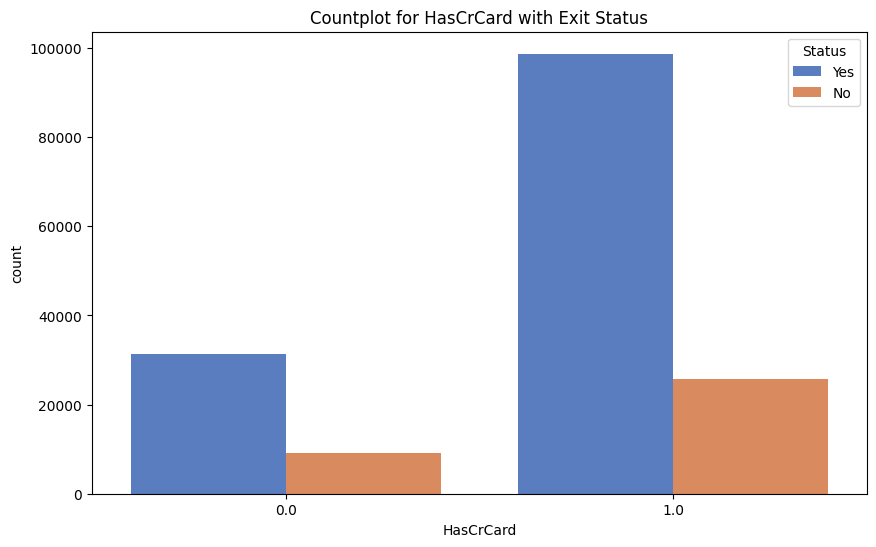

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HasCrCard', data=df, hue='Exited', palette='muted')

# Customize legend labels
plt.legend(title='Status', labels=['Yes', 'No'])

plt.title('Countplot for HasCrCard with Exit Status')
plt.show()


> ***`Figure-7:`*** Provides us information about **Exited** and **Non-Exited** Users from **HasCrCard** Column:

### Encoded the Categorical Values by Using Label Encoder

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Surname'] = le.fit_transform(df['Surname'])

In [64]:
df.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,937,588,1,1,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,415,593,0,0,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,519,678,2,1,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,1589,676,0,1,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,407,583,1,1,40.0,4,81274.33,1,1.0,1.0,170843.07,0


### Drop Unecessary Columns

In [65]:
# split the data into X and y
X = df.drop(['Exited', 'id', "CustomerId"] , axis=1)
y = df['Exited']

### Split our data into X and y

In [66]:
# train test split the data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

### Neural Networks and TensorFlow

In [67]:
# %%time
# # create a deep neural network using tensorflow for binary classification

# # Building the model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', 
#                           input_shape=(X_train.shape[1],)), # Input layer
#     tf.keras.layers.Dense(32, activation='relu'), # Hidden layer 1
#     tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 2
#     tf.keras.layers.Dense(8, activation='relu'), # Hidden layer 3
    
#     tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
# ])

# # Define the callback function
# early_stopping = EarlyStopping(patience=15)

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # train the model and plot the training and testing loss and accuracy at each epoc
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test), 
#                     callbacks=[early_stopping])

# # plot the training and testing loss and accuracy at each epoc
# fig, ax = plt.subplots(figsize=(10, 8))
# ax.plot(history.history['loss'], label='Training loss')
# ax.plot(history.history['val_loss'], label='Validation loss')
# ax.legend()
# plt.show()

# fig, ax = plt.subplots(figsize=(10, 8))
# ax.plot(history.history['accuracy'], label='Training accuracy')
# ax.plot(history.history['val_accuracy'], label='Validation accuracy')
# ax.legend()
# plt.show()

Accuracy score:  0.8672402823643469
Precision score:  0.8672402823643469
Recall score:  0.8672402823643469
F1 score:  0.8672402823643469


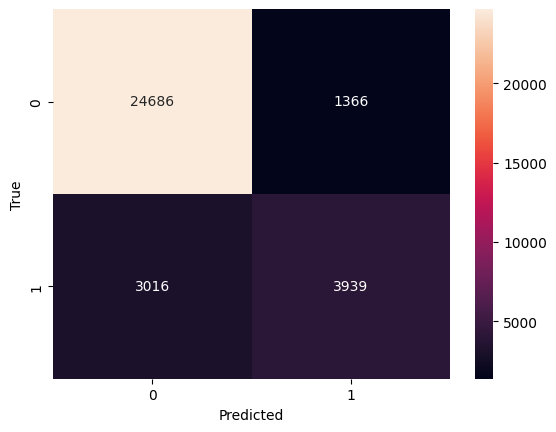

In [68]:
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [69]:
# from sklearn.preprocessing import LabelEncoder

# # Convert categorical columns to numerical values
# le = LabelEncoder()
# df_test['Geography'] = le.fit_transform(df_test['Geography'])
# df_test['Gender'] = le.fit_transform(df_test['Gender'])

# # predict the test data and create a submission file of probability of each class
# y_pred = xgb.predict_proba(df_test.drop(['id', 'CustomerId', 'Surname', "HasCrCard"], axis=1))

# submission['Exited'] = y_pred[:, 1]
# submission.to_csv('submission.csv', index=False)



[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1113
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
Accuracy score:  0.8696337140606538
Precision score:  0.8696337140606538
Recall score:  0.8696337140606538
F1 score:  0.8696337140606538


Text(50.722222222222214, 0.5, 'True')

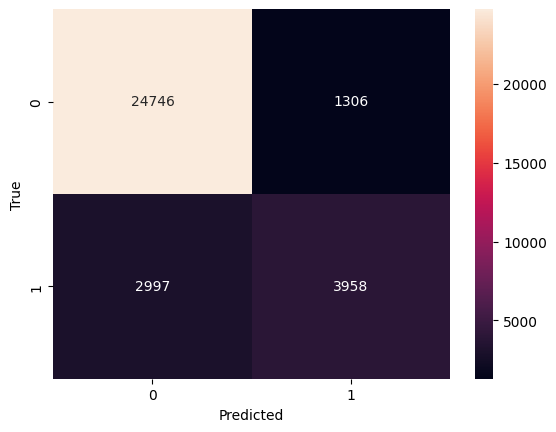

In [70]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train the LightGBM model
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

# Predict the test data
y_pred = lgbm.predict(X_test)

# Print evaluation metrics
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

# Plot the confusion matrix
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')


In [71]:
# from lightgbm import LGBMClassifier
# from sklearn.preprocessing import LabelEncoder

# # Assuming you have trained the LightGBM model (lgbm) already

# # Convert categorical columns to numerical values
# le = LabelEncoder()
# df_test['Geography'] = le.fit_transform(df_test['Geography'])
# df_test['Gender'] = le.fit_transform(df_test['Gender'])
# # df_test['Surname'] = le.fit_transform(df_test['Surname'])
# # Drop irrelevant columns
# features_test = df_test.drop([ 'id','CustomerId'], axis=1)

# # Predict the probabilities for each class
# y_pred_prob = lgbm.predict_proba(features_test)

# # Assuming 'Exited' is the second column in the prediction probabilities
# submission['Exited'] = y_pred_prob[:, 1]

# # Save the submission file
# submission.to_csv('submission.csv', index=False)

Learning rate set to 0.082881
0:	learn: 0.6205700	total: 297ms	remaining: 4m 56s
1:	learn: 0.5632193	total: 397ms	remaining: 3m 17s
2:	learn: 0.5195944	total: 518ms	remaining: 2m 52s
3:	learn: 0.4840050	total: 587ms	remaining: 2m 26s
4:	learn: 0.4542175	total: 645ms	remaining: 2m 8s
5:	learn: 0.4313492	total: 701ms	remaining: 1m 56s
6:	learn: 0.4140581	total: 752ms	remaining: 1m 46s
7:	learn: 0.3994710	total: 880ms	remaining: 1m 49s
8:	learn: 0.3877277	total: 941ms	remaining: 1m 43s
9:	learn: 0.3781759	total: 985ms	remaining: 1m 37s
10:	learn: 0.3701542	total: 1.05s	remaining: 1m 34s
11:	learn: 0.3633971	total: 1.1s	remaining: 1m 30s
12:	learn: 0.3584031	total: 1.17s	remaining: 1m 28s
13:	learn: 0.3538999	total: 1.23s	remaining: 1m 26s
14:	learn: 0.3493431	total: 1.3s	remaining: 1m 25s
15:	learn: 0.3466853	total: 1.36s	remaining: 1m 23s
16:	learn: 0.3436057	total: 1.42s	remaining: 1m 22s
17:	learn: 0.3408456	total: 1.5s	remaining: 1m 21s
18:	learn: 0.3392561	total: 1.57s	remaining: 1m 

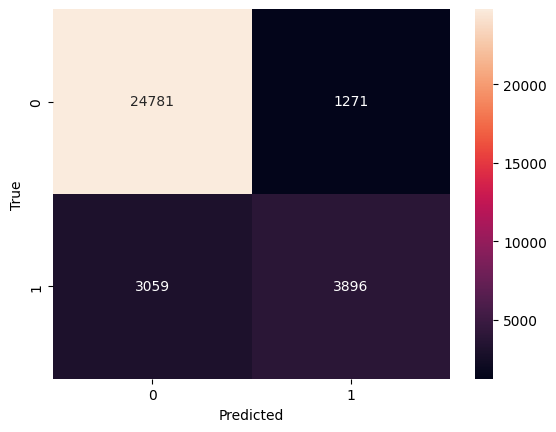

In [36]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train the CATBoost model
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

# Predict the test data
y_pred = catboost_model.predict(X_test)

# Print evaluation metrics
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))


# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [75]:
# Assuming you have trained the CatBoost model (catboost_model) already

from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical values
le = LabelEncoder()

df_test['Geography'] = le.fit_transform(df_test['Geography'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])
df_test["Surname"] = le.fit_transform(df_test["Surname"])
# Drop irrelevant columns
features_test = df_test.drop(["id" ,'CustomerId'], axis=1)

# Predict the probabilities for each class
y_pred_prob = catboost_model.predict_proba(features_test)

# Assuming 'Exited' is the second column in the prediction probabilities
submission['Exited'] = y_pred_prob[:, 1]

# Save the submission file
submission.to_csv('submission.csv', index=False)


### Conclusion: 
- When we use Neural Networks and Tensorflow we got the Accuracy 0.7893 
- When we use XGBoost we got the Accuracy 0.86505
- When we use LGBM we got the Accuracy 0.8696
- When we use CatBoost we get the accuracy 0.8688

XGBoost is very much better then the Neural Networks in this Case. But **LGBM** and **CatBoost** is perform slightly more better than XGBoost